# Overview of All Filter Feature Selection Methods

# Feature Selection

Feature selection is a technique used in machine learning and data mining to improve model performance, reduce irrelevant information, and decrease computational costs. It aims to identify the most important or influential variables among those present in the dataset. During this process, unnecessary or low-impact features are removed, or only those that contribute the most to model performance are selected. Feature selection reduces data dimensionality, thereby enhancing the model's generalization ability, reducing the risk of overfitting, and making the model simpler and more interpretable.

# Filter Methods

Filter method is one of the feature selection techniques in machine learning, which involves evaluating each feature independently of the machine learning algorithm. It ranks the features based on certain criteria, such as correlation, statistical tests, or information gain, and selects the top-ranked features for model training. Unlike wrapper and embedded methods, filter methods are computationally less expensive and less prone to overfitting, making them suitable for high-dimensional datasets. However, they may overlook interactions between features. Overall, filter methods serve as an initial step in feature selection, providing insights into the relevance of individual features to the target variable.

# All Filter Methods Used in This Package:

* Fisher Score
* T-Score
* Welch's t-statistic
* Chi-Squared
* Information Gain
* Gain Ratio
* Symmetric Uncertainty Coefficient
* Relief Score
* Relief-F
* mRMR
* Absolute Pearson Correlation Coefficients
* Maximum Likelihood Feature Selection
* Least Squares Feature Selection
* Laplacian Feature Selection Score
* Mutual Information
* Euclidean Distance
* Cramer's V test
* Markov Blanket Filter
* Kruskal-Wallis test



# Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
!pip install skrebate

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29255 sha256=06c675ceffee078dd98ca00a7119cb255d254dbb27f3706f04a82e3ab85a26c1
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built skrebate


# Import Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,842517,M,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,84300903,M,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,84348301,M,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,84358402,M,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


In [ ]:
def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [ ]:
df = label_encoder(df, "diagnosis")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,842517,1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,84300903,1,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,84348301,1,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,84358402,1,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


# General Information About to the Dataset

In [ ]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

######################### Head #########################
         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0    842302          1      17.9900       10.3800        122.8000  1001.0000           0.1184            0.2776          0.3001               0.1471         0.2419                  0.0787     1.0950      0.9053        8.5890 153.4000         0.0064          0.0490        0.0537             0.0159       0.0300                0.0062       25.3800        17.3300         184.6000   2019.0000            0.1622             0.6656           0.7119             

# Analysis of Categorical and Numerical Variables

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")
print(f"num_but_cat: {len(num_but_cat)}")

Observations: 569
Variables: 32
Cat_cols: 1
Num_cols: 31
Cat_but_car: 0
num_but_cat: 1


# Fisher Score

Fisher Score is a feature selection method used for binary classification problems. It measures the discriminatory power of a feature between two classes. This metric calculates the ratio of the squared difference between the means of feature values for each class to the sum of variances within each class. A high Fisher Score indicates that the feature provides a strong discrimination between classes and is thus more valuable as a feature. The formula for Fisher Score is as follows:

$$ \text{Fisher Score} = \frac{(\text{class1_mean} - \text{class2_mean})^2}{\text{class1_variance} + \text{class2_variance}} $$


Here:
$ \text{class1_mean}\ $ and $\text{class2_mean}$ are the means of feature values for the two classes.
$\text{class1_variance}$ and $\text{class2_variance}$ are the variances of feature values for the two classes.

This formula quantifies the separability of a feature between classes, making it useful for feature selection to enhance model performance and reduce irrelevant information.



In [ ]:
def calculate_fisher_score(dataframe, drop_labels, target, plot_importance=True):
    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns
    X = np.array(input_data)
    y = np.array(output_data)

    # Detect unique class labels
    unique_classes = np.unique(y)
    if len(unique_classes) != 2:
        raise ValueError("Target variable must have exactly 2 unique classes.")

    # Calculate Fisher Scores
    mean_class1 = np.mean(X[y == unique_classes[0]], axis=0)
    mean_class2 = np.mean(X[y == unique_classes[1]], axis=0)
    var_class1 = np.var(X[y == unique_classes[0]], axis=0)
    var_class2 = np.var(X[y == unique_classes[1]], axis=0)

    fisher_scores = ((mean_class1 - mean_class2)**2) / (var_class1 + var_class2)

    # Sort Fisher Scores
    ranked_features = np.argsort(fisher_scores)[::-1]

    if plot_importance:
        # Plot Feature Importance
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), fisher_scores[ranked_features], align='center', color='skyblue')
        plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Fisher Score')
        plt.title('Fisher Score for Features')
        plt.tight_layout()
        plt.show()

    return fisher_scores, ranked_features


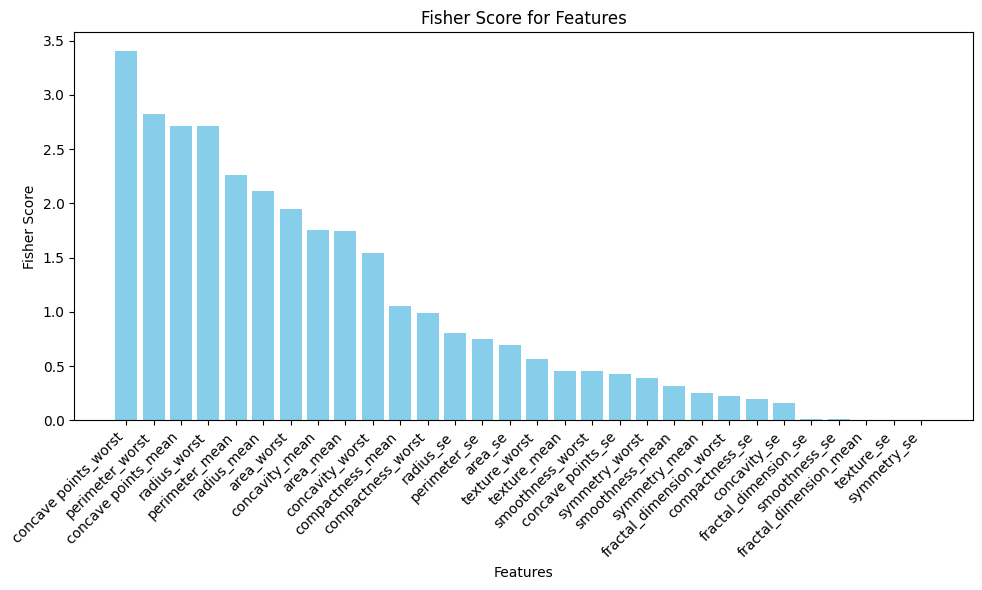

In [ ]:
fisher_scores, fisher_ranked_features = calculate_fisher_score(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# T-Score

T-Score is a method used for feature selection, primarily employed to determine the differences between classes of features. It is a metric commonly used in classification problems. T-Score is a statistical test used to measure the contribution of features to the classification process.

T-Score measures the mean difference between classes of features based on their standard deviations. The formula is as follows:

$$ \text{T-Score} = \frac{\text{mean}(c_1) - \text{mean}(c_2)}{\sqrt{\frac{\text{var}(c_1)}{n_1} + \frac{\text{var}(c_2)}{n_2}}} $$

Where:
- $ \text{mean}(c_1) $ and $\text{mean}(c_2)$ are the mean values of the feature for classes 1 and 2 respectively.
- $\text{var}(c_1)$ and $\text{var}(c_2)$ are the variances of the feature for classes 1 and 2 respectively.
- $n_1$ and $n_2$ are the numbers of samples in classes 1 and 2 respectively.

The absolute value of T-Score represents the magnitude of the difference between classes of features. A large T-Score indicates a significant difference between classes, while a small T-Score indicates a less pronounced difference.

In [ ]:
def calculate_t_score(dataframe, drop_labels, target, plot_importance=True):
    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns
    X = np.array(input_data)
    y = np.array(output_data)

    # Detect unique class labels
    unique_classes = np.unique(y)
    if len(unique_classes) != 2:
        raise ValueError("Target variable must have exactly 2 unique classes.")

    # Calculate T-Scores
    mean_class1 = np.mean(X[y == unique_classes[0]], axis=0)
    mean_class2 = np.mean(X[y == unique_classes[1]], axis=0)
    std_class1 = np.std(X[y == unique_classes[0]], axis=0)
    std_class2 = np.std(X[y == unique_classes[1]], axis=0)
    n1 = np.sum(y == unique_classes[0])
    n2 = np.sum(y == unique_classes[1])

    t_scores = np.abs((mean_class1 - mean_class2) / np.sqrt((std_class1**2 / n1) + (std_class2**2 / n2)))

    # Sort T-Scores
    ranked_features = np.argsort(t_scores)[::-1]

    if plot_importance:
        # Plot Feature Importance
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), t_scores[ranked_features], align='center', color='skyblue')
        plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('T-Score')
        plt.title('T-Score for Features')
        plt.tight_layout()
        plt.show()

    return t_scores, ranked_features

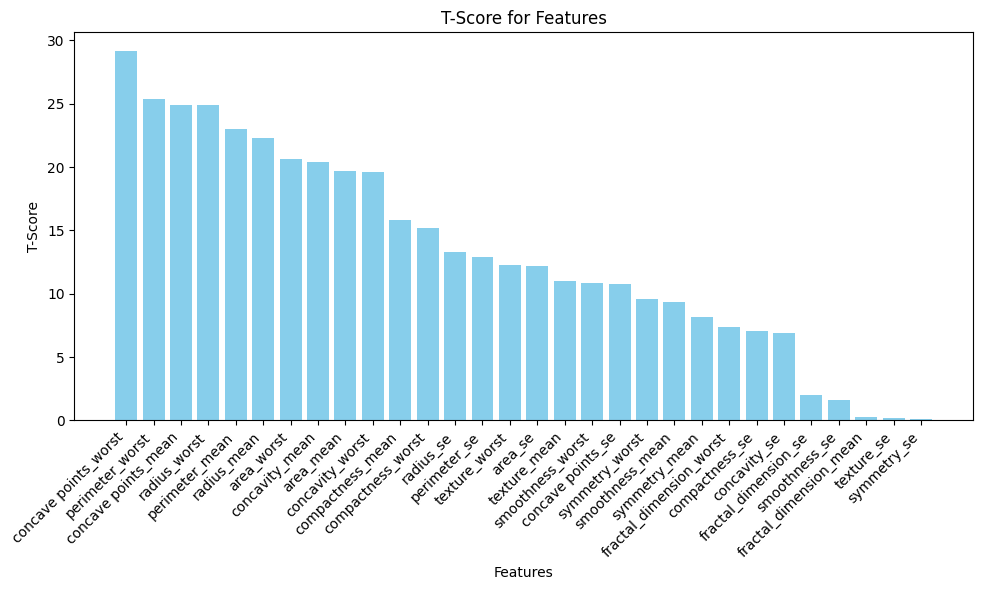

In [ ]:
t_scores, t_score_ranked_features = calculate_t_score(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Welch's t-statistic

Welch's t-statistic is a method used for feature selection, and it is used to determine the differences between groups of features. Welch's t-statistic calculates the difference between the means of groups, as well as the within-group variances and the sizes of the samples.

Derived from the Student's t-test, Welch's t-statistic provides more reliable results when dealing with different group sizes and variances. Hence, it is seen as a more flexible option for evaluating the distinction of features between groups.

The calculation of Welch's t-statistic involves computing the difference between the means of two groups, normalized by the standard error. This normalization takes into account the reliability of the difference between groups while measuring how distinct the groups are.

The mathematical formula for Welch's t-statistic is as follows:

$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$

Here:
- $ \bar{X}_1 $ and $\bar{X}_2$ are the sample means of Group 1 and Group 2, respectively.
- $s_1^2$ and $ s_2^2 $ are the sample variances of Group 1 and Group 2, respectively.
- $ n_1 $ and $ n_2 $ are the sample sizes of Group 1 and Group 2, respectively.

When computing Welch's t-statistic, the difference between group means is normalized by the standard error. This normalization allows for measuring the magnitude of the difference between groups while considering the reliability of this difference.

In [ ]:
def calculate_welch_t_score(dataframe, drop_labels, target, plot_importance=True):
    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns
    X = np.array(input_data)
    y = np.array(output_data)

    # Detect unique class labels
    unique_classes = np.unique(y)
    if len(unique_classes) != 2:
        raise ValueError("Target variable must have exactly 2 unique classes.")

    # Calculate Welch T-Scores
    mean_class1 = np.mean(X[y == unique_classes[0]], axis=0)
    mean_class2 = np.mean(X[y == unique_classes[1]], axis=0)
    var_class1 = np.var(X[y == unique_classes[0]], axis=0, ddof=1)
    var_class2 = np.var(X[y == unique_classes[1]], axis=0, ddof=1)
    n1 = np.sum(y == unique_classes[0])
    n2 = np.sum(y == unique_classes[1])

    welch_t_scores = np.abs((mean_class1 - mean_class2) / np.sqrt((var_class1 / n1) + (var_class2 / n2)))

    # Sort Welch T-Scores
    ranked_features = np.argsort(welch_t_scores)[::-1]

    if plot_importance:
        # Plot Feature Importance
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), welch_t_scores[ranked_features], align='center', color='skyblue')
        plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Welch T-Score')
        plt.title('Welch T-Score for Features')
        plt.tight_layout()
        plt.show()

    return welch_t_scores, ranked_features

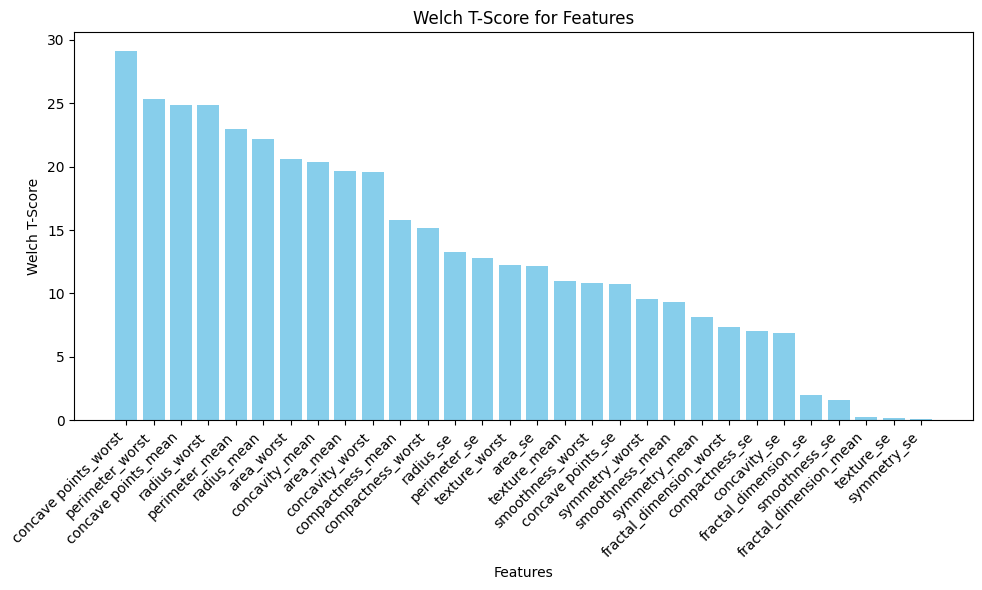

In [ ]:
welch_scores, welch_ranked_features = calculate_welch_t_score(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# $Chi^2$

The chi-square (χ²) statistic is a method used for feature selection, and it is employed to evaluate the relationship between features and the target variable. Specifically, it is a metric used in classification problems, particularly when dealing with categorical features. The chi-square statistic is utilized to test whether a feature is independent of the target variable.

The chi-square statistic measures the strength of the relationship between a feature and the target variable. This relationship can be used to determine the contribution of the feature to the classification performance. The chi-square test assesses the independence hypothesis between two categorical variables. It uses the ratio of the squared differences between observed and expected frequencies to determine whether there is a relationship between the two variables.

The mathematical formula for the chi-square statistic is as follows:

$chi$ =$\sum \frac{(O_i - E_i)^2}{E_i} $

Where:
- $ chi^² $ represents the chi-square statistic.
- $ O_i $ denotes the observed frequency, i.e., the actual frequencies of category combinations in the dataset.
- $ E_i $ represents the expected frequency, i.e., the frequencies that would occur if the two variables were independent.

The chi-square statistic computes the sum of the ratios of squared differences between observed and expected frequencies for each category combination. This provides a statistic that measures the relationship between the feature and the target variable. A large chi-square value indicates a strong relationship between the feature and the target variable, while a small value suggests a weak relationship.


In [ ]:
def calculate_chi2_score(dataframe, drop_labels, target, plot_importance=True):
    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns

    # Convert categorical variables to numerical labels
    input_data = input_data.apply(lambda x: pd.factorize(x)[0])
    X = np.array(input_data)
    y = np.array(output_data)

    # Calculate Chi-Squared Scores
    from sklearn.feature_selection import chi2
    chi2_scores, _ = chi2(X, y)

    # Sort Chi-Squared Scores
    ranked_features = np.argsort(chi2_scores)[::-1]

    if plot_importance:
        # Plot Feature Importance
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), chi2_scores[ranked_features], align='center', color='skyblue')
        plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Chi-Squared Score')
        plt.title('Chi-Squared Score for Features')
        plt.tight_layout()
        plt.show()

    return chi2_scores, ranked_features


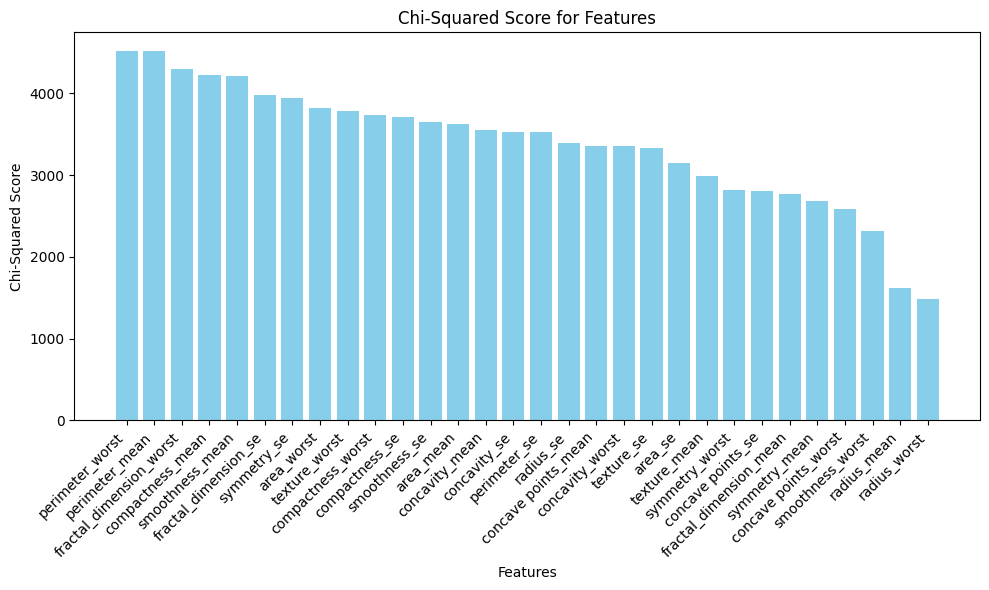

In [ ]:
chi2_scores, chi2_ranked_features = calculate_chi2_score(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Information Gain

Information Gain is a feature selection criterion used in classification algorithms such as decision trees. Information Gain measures how well a feature can separate a given dataset. It is typically defined as the reduction in entropy (information uncertainty) when a dataset is split based on a particular feature.

Information Gain is calculated as follows:

$ IG(D, A) = H(D) - H(D|A) $

Where:
- $ IG(D, A) $ represents the information gain between the dataset $ D $ and the feature $ A $.
- $ H(D) $ is the entropy of the dataset $ D $. It is zero when the dataset is homogeneous.
- $ H(D|A) $ is the conditional entropy of the dataset $ D $ given feature $ A $. It measures how homogeneous the dataset becomes after being split based on the values of the feature.

The conditional entropy of a feature is the weighted average of the entropies of the subsets obtained after splitting the dataset based on the values of that feature.

Information Gain is one of the most commonly used metrics for feature selection, especially in decision tree algorithms. However, other metrics such as Gini impurity or error rate, which are also used in decision trees, can be considered as well when calculating feature importance.


In [ ]:
def calculate_entropy(y):
    unique, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_conditional_entropy(feature, y):
    unique_values, value_counts = np.unique(feature, return_counts=True)
    conditional_entropy = 0
    total_samples = len(feature)
    for value, count in zip(unique_values, value_counts):
        subset_indices = np.where(feature == value)[0]
        subset_target = y[subset_indices]
        subset_entropy = calculate_entropy(subset_target)
        conditional_entropy += (count / total_samples) * subset_entropy
    return conditional_entropy

def calculate_information_gain(dataframe, drop_labels, target, plot_importance=True):
    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns
    X = np.array(input_data)
    y = np.array(output_data)

    # Calculate Entropy of the whole dataset
    entropy_whole = calculate_entropy(y)

    # Calculate Information Gain for each feature
    information_gains = []
    for i in range(X.shape[1]):
        information_gains.append(entropy_whole - calculate_conditional_entropy(X[:, i], y))

    # Sort Information Gains
    ranked_features = np.argsort(information_gains)[::-1]

    if plot_importance:
        # Plot Feature Importance
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), np.array(information_gains)[ranked_features], align='center', color='skyblue')
        plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Information Gain')
        plt.title('Information Gain for Features')
        plt.tight_layout()
        plt.show()

    return information_gains, ranked_features

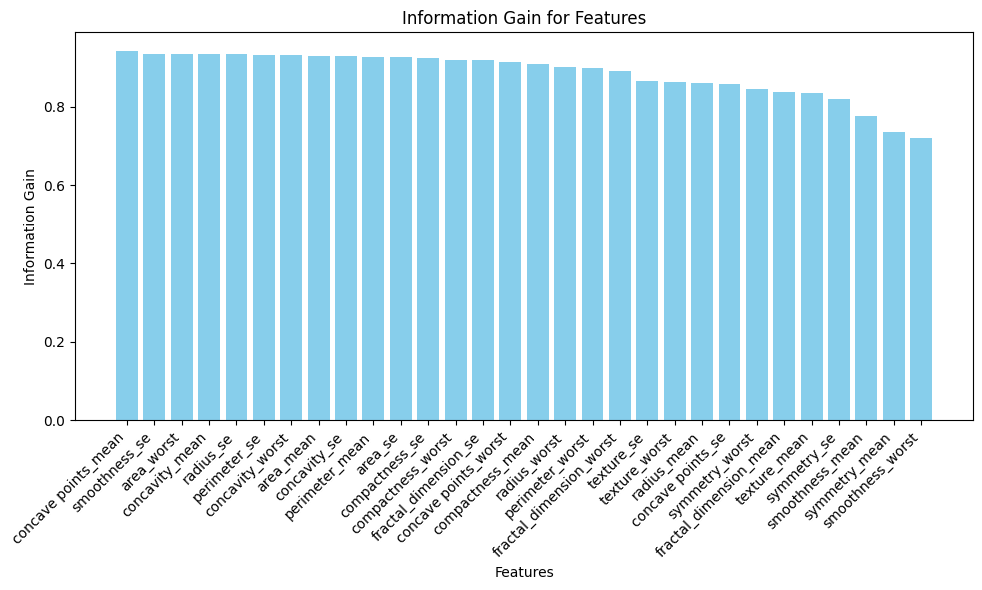

In [ ]:
information_gains, information_gains_ranked_features = calculate_information_gain(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Gain Ratio

Gain Ratio is a feature selection criterion used to measure the importance of features during the feature selection process. It is a type of Information Gain and represents a normalized version of Information Gain which accounts for the intrinsic information content of a split.

Gain Ratio measures the homogeneity of subsets created by splitting on a feature, while balancing this homogeneity with the number of values the feature can take. It addresses the tendency of features with a large number of unique values to have higher Information Gain by normalizing it with the split information.

Gain Ratio is typically calculated as follows:

$ \text{Gain Ratio}(A) = \frac{\text{Information Gain}(A)}{\text{Split Information}(A)} $

Where:
- $ \text{Gain Ratio}(A) $ represents the Gain Ratio for feature $ A $.
- $ \text{Information Gain}(A) $ represents the Information Gain for feature $ A $.
- $ \text{Split Information}(A) $ represents the level of information created by splitting on feature $ A $.

Split Information is calculated based on the number of values a feature can take. When features have a large number of unique values, resulting in lower Split Information, the Gain Ratio tends to be higher.

Thus, Gain Ratio provides a balanced measure of Information Gain, making it a fairer criterion for feature selection, especially when dealing with features with varying numbers of unique values.

In [ ]:
def calculate_split_information(feature):
    unique_values, counts = np.unique(feature, return_counts=True)
    probabilities = counts / len(feature)
    split_information = -np.sum(probabilities * np.log2(probabilities))
    return split_information

def calculate_gain_ratio(dataframe, drop_labels, target, plot_importance=True):
    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns
    X = np.array(input_data)
    y = np.array(output_data)

    # Calculate Information Gain for each feature
    information_gains, _ = calculate_information_gain(dataframe, drop_labels, target, plot_importance=False)

    # Calculate Split Information for each feature
    split_information = []
    for i in range(X.shape[1]):
        split_information.append(calculate_split_information(X[:, i]))

    # Calculate Gain Ratio for each feature
    gain_ratios = np.array(information_gains) / np.array(split_information)

    # Sort Gain Ratios
    ranked_features = np.argsort(gain_ratios)[::-1]

    if plot_importance:
        # Plot Feature Importance
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), gain_ratios[ranked_features], align='center', color='skyblue')
        plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Gain Ratio')
        plt.title('Gain Ratio for Features')
        plt.tight_layout()
        plt.show()

    return gain_ratios, ranked_features

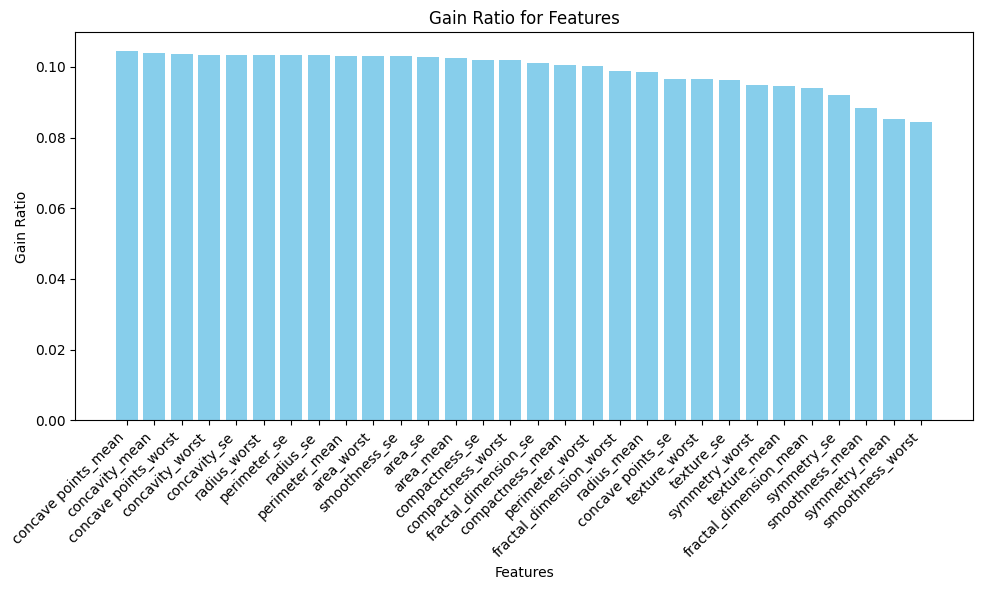

In [ ]:
gain_ratios, gain_ratios_ranked_features = calculate_gain_ratio(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Symmetric Uncertainty Coefficient

Symmetric Uncertainty Coefficient (SUC) is a feature selection criterion used to measure the relationship between two variables. It is commonly employed to evaluate the dependency between categorical variables. SUC is based on the mutual information between variables and normalizes this information based on the entropies of the variables.

The corrected formula is as follows:

$ SUC(X, Y) = \frac{2 \times \text{Information Gain}(X, Y)}{H(X) + H(Y)} $

Here:
- $ SUC(X, Y) $ represents the Symmetric Uncertainty Coefficient between variables $ X $ and $ Y $.
- $ \text{Information Gain}(X, Y) $ represents the information gain between variables $ X $ and $ Y $.
- $ H(X) $ and $ H(Y) $ represent the entropies of variables $ X $ and $ Y $, respectively.

In this formula, Information Gain is used to measure the relationship between variables. Entropy measures the uncertainty of a random variable. Symmetric Uncertainty Coefficient evaluates the relationship between variables by normalizing Information Gain based on the entropies of the variables.

The SUC value ranges between 0 and 1. 0 indicates no dependency between variables, while 1 represents complete dependency. Therefore, SUC is a useful measure for understanding the relationship between categorical variables and for feature selection purposes.

In [ ]:
def calculate_symmetric_uncertainty_coefficient(dataframe, drop_labels, target, plot_importance=True):
    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns

    # Calculate Information Gain for each feature
    information_gains, _ = calculate_information_gain(dataframe, drop_labels, target, plot_importance=False)

    # Calculate Symmetric Uncertainty Coefficients
    symmetric_uncertainty_coefficients = []
    for feature, ig in zip(input_data.columns, information_gains):
        entropy_feature = calculate_entropy(input_data[feature])
        entropy_target = calculate_entropy(output_data)
        symmetric_uncertainty_coefficient = (2 * ig) / (entropy_feature + entropy_target)
        symmetric_uncertainty_coefficients.append(symmetric_uncertainty_coefficient)

    # Sort Symmetric Uncertainty Coefficients
    ranked_features = np.argsort(symmetric_uncertainty_coefficients)[::-1]

    if plot_importance:
        # Plot Feature Importance
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), np.array(symmetric_uncertainty_coefficients)[ranked_features], align='center', color='skyblue')
        plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Symmetric Uncertainty Coefficient')
        plt.title('Symmetric Uncertainty Coefficient for Features')
        plt.tight_layout()
        plt.show()

    return symmetric_uncertainty_coefficients, ranked_features

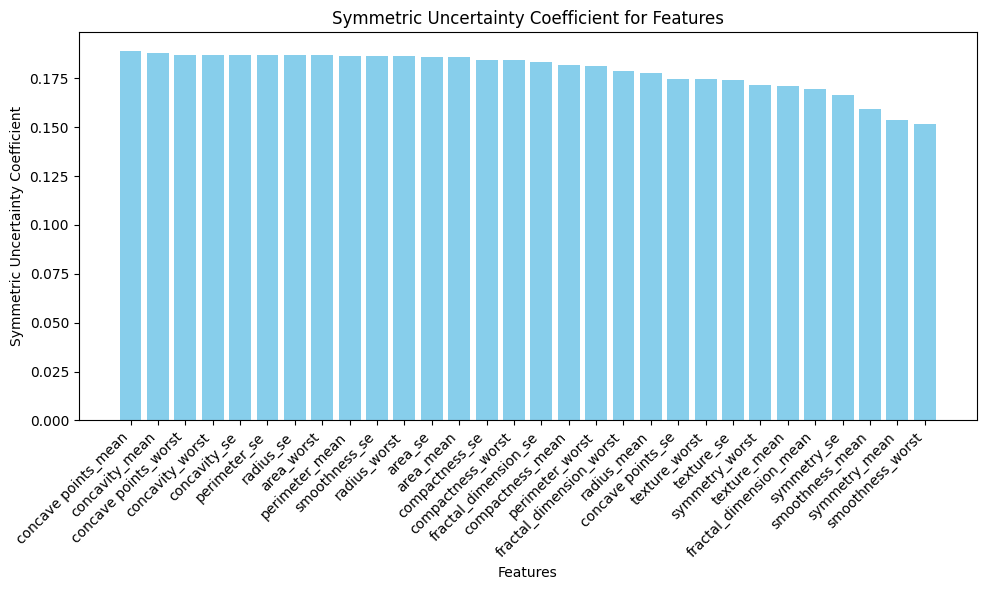

In [ ]:
symmetric_uncertainty_coefficients, suc_ranked_features = calculate_symmetric_uncertainty_coefficient(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Relief Score

Relief is an algorithm used for feature selection, commonly applied in classification problems. Relief measures the contribution of features to the classification model by using a weight vector. The Relief score for each feature is equal to the absolute value of its weight.

The mathematical formulation of the Relief algorithm is as follows:

Firstly, for each feature $ j $, $ r_{aj} $ and $ r_{bj} $ represent the average of squared differences between the values of the feature and its nearest neighbors belonging to the same and different classes, respectively.

$ r_{aj} = \frac{\sum_{i=1}^{n} (x_{ij} - x_{ij}^{'})^2}{n_a} $
$ r_{bj} = \frac{\sum_{i=1}^{n} (x_{ij} - x_{ij}^{''})^2}{n_b} $

Where:
- $ n $ represents the total number of samples in the dataset.
- $ n_a $ represents the number of samples belonging to the same class.
- $ n_b $ represents the number of samples belonging to a different class.
- $ x_{ij} $ represents the value of feature $ j $ in the $ i $th sample.
- $ x_{ij}' $ represents the value of feature $ j $ in the nearest neighbor belonging to the same class in the $ i $th sample.
- $ x_{ij}'' $ represents the value of feature $ j $ in the nearest neighbor belonging to a different class in the $ i $th sample.

Then, the Relief score for each feature is calculated as follows:

$ W_j = \frac{\sum_{i=1}^{n} [-(x_{ij} - x_{ij}^{'})^2 + (x_{ij} - x_{ij}^{''})^2]}{n} $

In this formula, $ W_j $ represents the Relief score for feature $ j $, $ x_{ij} $ represents the value of feature $ j $ in the $ i $th sample, $ x_{ij}' $ represents the value of the nearest neighbor belonging to the same class in the $ i $th sample, and $ x_{ij}'' $ represents the value of the nearest neighbor belonging to a different class in the $ i $th sample.

The Relief score measures the contribution of features to the classification model. A higher Relief score indicates that the feature is more important.



In [ ]:
def calculate_relief(dataframe, drop_labels, target, plot_importance=True):

    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns

    n_samples, n_features = input_data.shape

    # Initialize weights
    weights = np.zeros(n_features)

    for i in range(n_samples):
        # Find nearest instance of the same class (near hit)
        near_hit_idx = np.argmin(np.linalg.norm(input_data[output_data == output_data.iloc[i]] - input_data.iloc[i], axis=1))
        near_hit = input_data.iloc[near_hit_idx]

        # Find nearest instance of a different class (near miss)
        diff_class_idx = np.argmin(np.linalg.norm(input_data[output_data != output_data.iloc[i]] - input_data.iloc[i], axis=1))
        near_miss = input_data.iloc[diff_class_idx]

        # Update weights
        weights += -np.square(input_data.iloc[i] - near_hit) + np.square(input_data.iloc[i] - near_miss)

    # Average the weights over all instances
    weights /= n_samples

    # Sort weights
    ranked_features = np.argsort(weights)[::-1]

    if plot_importance:
        # Plot Feature Importance
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), weights[ranked_features], align='center', color='skyblue')
        plt.xticks(range(len(ranked_features)), feature_names[ranked_features], rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Relief Score')
        plt.title('Relief Score for Features')
        plt.tight_layout()
        plt.show()

    return weights, ranked_features

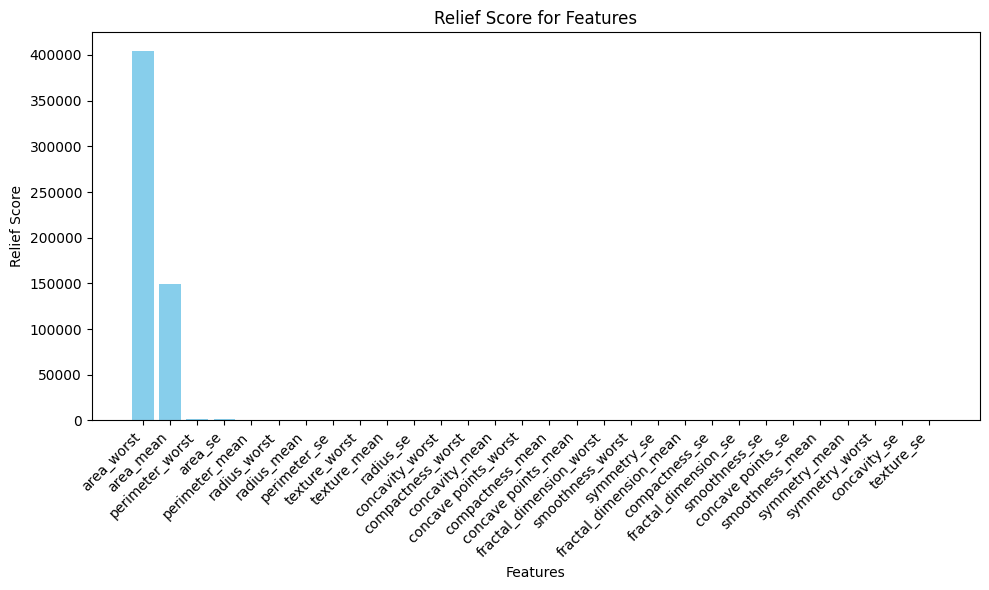

In [ ]:
relief_scores, relief_ranked_features = calculate_relief(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Relief-F

Relief-F is a fast version of the Relief algorithm. It is used for feature selection and is a commonly used method for this purpose.

The Relief-F algorithm evaluates the relationship of each feature with the class labels. For each feature, the algorithm estimates its importance through the nearest neighbors of each data point (instance).

Mathematically, the Relief-F algorithm computes the feature importance using the following formula:

$ \text{Relief-F Score}(X_i) = \sum_{j=1}^{k} \frac{-\text{diff}(X_{ij}, X_{ij}^{near\_hit})^2 + \text{diff}(X_{ij}, X_{ij}^{near\_miss})^2}{k} $

Where:
- $ X_i $ : The feature being evaluated.
- $ X_{ij} $ : The $ j $th feature of the $ i $th instance.
- $ X_{ij}^{near\_hit} $ : The $ j $th feature of the nearest instance of the same class to $ X_{ij} $.
- $ X_{ij}^{near\_miss} $ : The $ j $th feature of the nearest instance of a different class to $ X_{ij} $.
- $ \text{diff}(X_{ij}, X_{ij}^{near\_hit}) $ : The difference between $ X_{ij} $ and $ X_{ij}^{near\_hit} $.
- $ \text{diff}(X_{ij}, X_{ij}^{near\_miss}) $ : The difference between $ X_{ij} $ and $ X_{ij}^{near\_miss} $.
- $ k $ : The number of nearest neighbors.

In this formula, for each feature, the average of the squared differences between the nearest instance of the same class and the nearest instance of a different class is computed. This value represents the importance of the feature. A higher Relief-F score indicates that the feature is more important.

In [ ]:
def calculate_relieff(dataframe, drop_labels, target, plot_importance=True):
    # Import Necessary Libraries
    #!pip install skrebate
    from skrebate import ReliefF

    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns

    # Initialize ReliefF object
    relieff = ReliefF()

    # Fit ReliefF to the data
    relieff.fit(input_data.values, output_data.values)

    # Get feature scores
    relieff_scores = relieff.feature_importances_

    # Sort scores and get ranked features
    ranked_features = relieff_scores.argsort()[::-1]

    if plot_importance:
        # Plot Feature Importance
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), relieff_scores[ranked_features], align='center', color='skyblue')
        plt.xticks(range(len(ranked_features)), feature_names[ranked_features], rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Relief Score')
        plt.title('Relief Score for Features')
        plt.tight_layout()
        plt.show()

    return relieff_scores, ranked_features

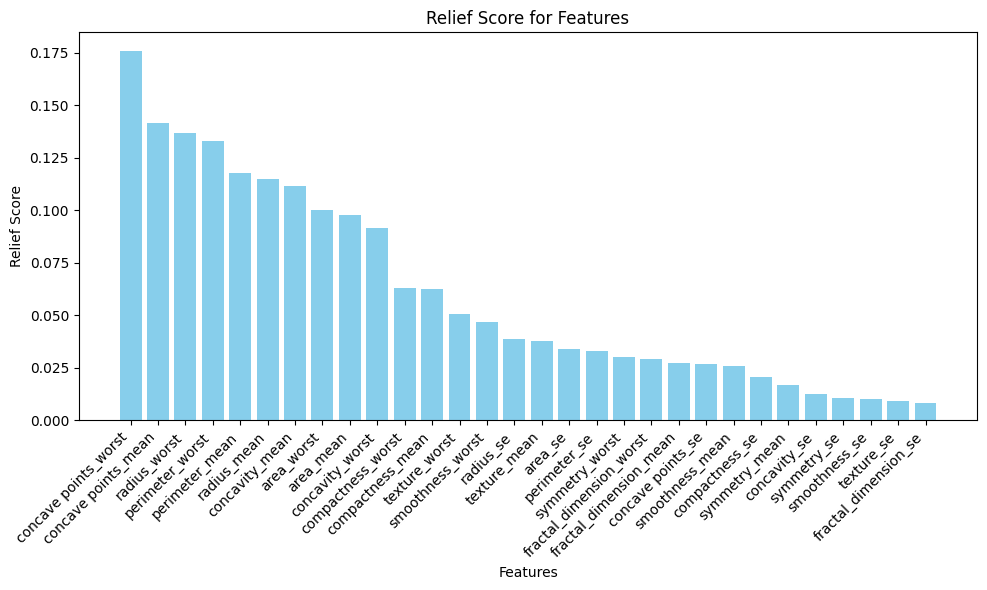

In [ ]:
relieff_scores, relieff_ranked_features = calculate_relieff(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# mRMR
The Minimum Redundancy Maximum Relevance (mRMR) is a feature selection method aiming to select features that have high relevance with the target variable while minimizing redundancy with each other.

The mathematical formula for mRMR is given as:

$ \text{mRMR}(X_i) = \text{Relevance}(X_i) - \frac{1}{|S|} \sum_{X_j \in S} \text{Redundancy}(X_i, X_j) $

Where:
- $ X_i $: The feature being evaluated.
- $ \text{Relevance}(X_i) $: A metric measuring the relevance of $ X_i $ with the target variable.
- $ S $: The set of other features selected along with $ X_i $.
- $ \text{Redundancy}(X_i, X_j) $: A metric measuring the redundancy between $ X_i $ and $ X_j $ features.

This formula calculates the mRMR score for each feature by subtracting the average redundancy with other features in set $ S $ from its relevance. The goal is to maximize the relevance while minimizing redundancy, hence selecting the most informative features for the model.

In [ ]:
def calculate_mrmr(dataframe, drop_labels, target, plot_importance=True):
    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns

    # Calculate relevance for each feature
    relevance_scores = calculate_relevance_scores(input_data, output_data)

    # Calculate redundancy for each feature with other features
    redundancy_scores = calculate_redundancy_scores(input_data)

    # Calculate MRMR scores
    mrmr_scores = relevance_scores - np.mean(redundancy_scores, axis=1)

    # Sort MRMR scores and get ranked features
    ranked_features = np.argsort(mrmr_scores)[::-1]

    if plot_importance:
        # Plot Feature Importance
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), mrmr_scores[ranked_features], align='center', color='skyblue')
        plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('mRMR Score')
        plt.title('mRMR Score for Features')
        plt.tight_layout()
        plt.show()

    return mrmr_scores, ranked_features

def calculate_relevance_scores(input_data, output_data):
    relevance_scores = []
    for feature in input_data.columns:
        relevance_scores.append(calculate_relevance(input_data[feature], output_data))
    return np.array(relevance_scores)

def calculate_relevance(feature, target):
    # Implement relevance calculation here, e.g., correlation coefficient
    correlation = np.abs(np.corrcoef(feature, target)[0, 1])
    return correlation

def calculate_redundancy_scores(input_data):
    redundancy_scores = []
    for feature1 in input_data.columns:
        redundancy_scores.append([calculate_redundancy(input_data[feature1], input_data[feature2]) for feature2 in input_data.columns])
    return np.array(redundancy_scores)

def calculate_redundancy(feature1, feature2):
    # Implement redundancy calculation here, e.g., correlation coefficient
    correlation = np.abs(np.corrcoef(feature1, feature2)[0, 1])
    return correlation

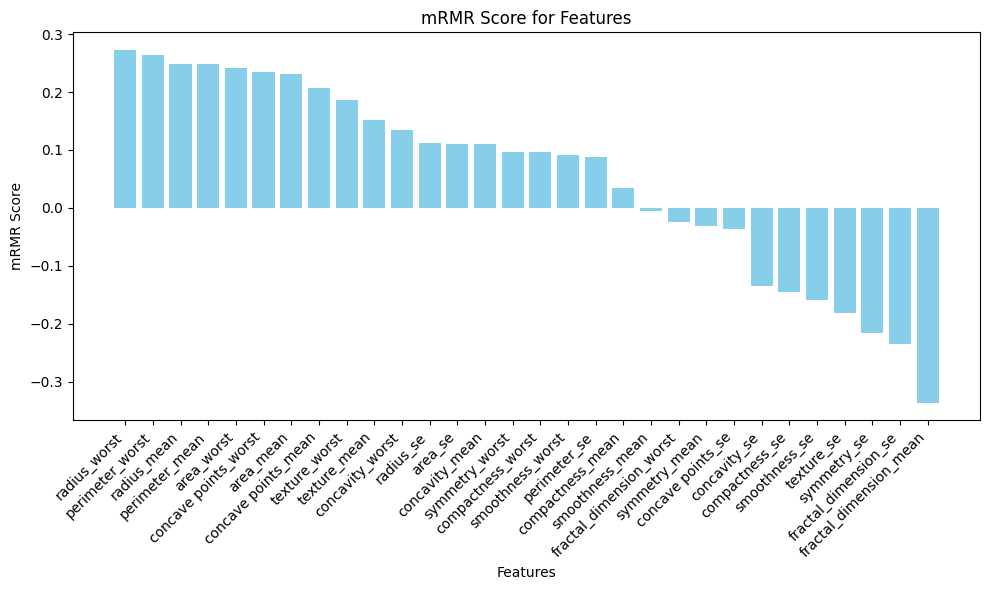

In [ ]:
mrmr_scores, mrmr_ranked_features = calculate_mrmr(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Absolute Pearson Correlation Coefficients

Feature selection based on correlation is a metric that measures the relationship between a feature and the target variable or other features. This relationship indicates how strongly features are related to each other or how much a feature is associated with the target variable.

The correlation coefficient is a statistical measure used to quantify the relationship between two variables. The most commonly used correlation coefficient is the Pearson correlation coefficient.

The Pearson correlation coefficient measures the linear relationship between two variables. Values range between -1 and 1:
- A value close to 1 indicates a positive linear relationship. That is, as one variable increases, the other variable also increases.
- A value close to -1 indicates a negative linear relationship. That is, as one variable increases, the other variable decreases.
- A value close to 0 indicates no linear relationship. There is no relationship between the two variables.

The Pearson correlation coefficient is calculated using the following formula:

$ r = \frac{\sum (X - \bar{X})(Y - \bar{Y})}{\sqrt{\sum (X - \bar{X})^2 \sum (Y - \bar{Y})^2}} $

Here:
- $ r $: Pearson correlation coefficient
- $ X $: Values of the first variable
- $ Y $: Values of the second variable
- $ \bar{X} $: Mean of variable $ X $
- $ \bar{Y} $: Mean of variable $ Y $

This formula calculates the covariance between two variables and the variance of each variable. Thus, it measures the nature of the relationship between two variables.

In [ ]:
def calculate_absolute_pearson_correlation(dataframe, drop_labels, target, plot_importance=True):
    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns

    # Calculate Pearson correlation coefficients
    correlation_coeffs = calculate_correlation_coeffs(input_data, output_data)

    # Sort correlation coefficients and get ranked features
    ranked_features = np.argsort(np.abs(correlation_coeffs))[::-1]

    if plot_importance:
        # Plot Feature Importance
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), np.abs(correlation_coeffs)[ranked_features], align='center', color='skyblue')
        plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Absolute Correlation Coefficient')
        plt.title('Absolute Pearson Correlation Coefficients with Target')
        plt.tight_layout()
        plt.show()

    return correlation_coeffs, ranked_features

def calculate_correlation_coeffs(input_data, output_data):
    correlation_coeffs = []
    for feature in input_data.columns:
        correlation = np.corrcoef(input_data[feature], output_data)[0, 1]
        correlation_coeffs.append(correlation)
    return np.array(correlation_coeffs)

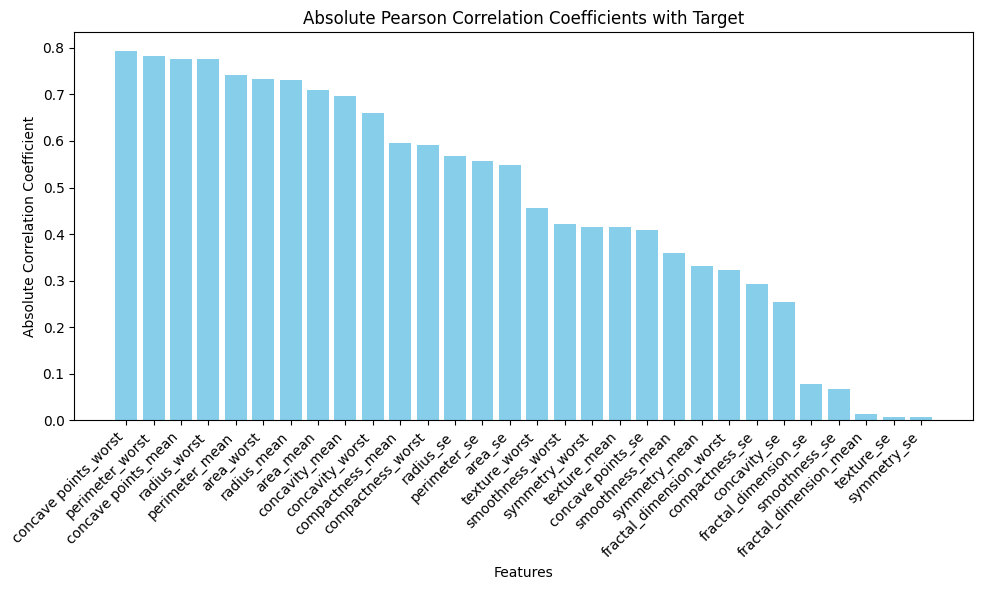

In [ ]:
absolute_pearson_correlation_coeffs, absolute_pearson_correlation_ranked_features = calculate_absolute_pearson_correlation(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Maximum Likelihood Feature Selection

Maximum Likelihood Feature Selection is a statistical method used for determining the features in a dataset. This method focuses on selecting the most appropriate features by measuring how well the dataset fits a particular model.

Mathematically, maximum likelihood feature selection aims to optimize a probability distribution used to model the relationship between a dataset and a target variable. Typically, parameters defining a probability distribution are fitted to the data, and then maximum likelihood estimators of this distribution are obtained. Subsequently, optimal parameters of the probability distribution are determined for each feature, and features are selected based on these parameters.

Mathematically, maximum likelihood feature selection is often expressed using a probability density function $f(x|\theta)$ over the dataset, where $x$ represents data points and $\theta$ represents the model's parameters. In this case, the maximum likelihood estimator $\hat{\theta}$ is defined as:

$ \hat{\theta} = \underset{\theta}{\arg\max} \prod_{i=1}^{n} f(x_i|\theta) $

Here, $n$ is the number of data points, and $x_i$ represents the $i$th example in the dataset. This formula is used to obtain maximum likelihood estimators of the probability distribution for each feature. Subsequently, these estimators are used to select the most appropriate features.




In [ ]:
def calculate_maximum_likelihood_feature_selection(dataframe, drop_labels, target, plot_importance=True):
    # Import Necessary Libraries
    from sklearn.linear_model import LinearRegression

    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns

    # Train the model with least squares
    model = LinearRegression()
    model.fit(input_data, output_data)

    # Coefficients (Maximum Likelihood Estimators)
    coefficients = model.coef_

    # Sort correlation coefficients and get ranked features
    ranked_features = np.argsort(np.abs(coefficients))[::-1]

    # Plot Importance Features
    if plot_importance:
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), np.abs(coefficients[ranked_features]), color='skyblue')
        plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45, ha='right')
        plt.xlabel('Coefficient Magnitude')
        plt.ylabel('Features')
        plt.title('Feature Importance (Maximum Likelihood)')
        plt.tight_layout()
        plt.show()

    return coefficients, ranked_features

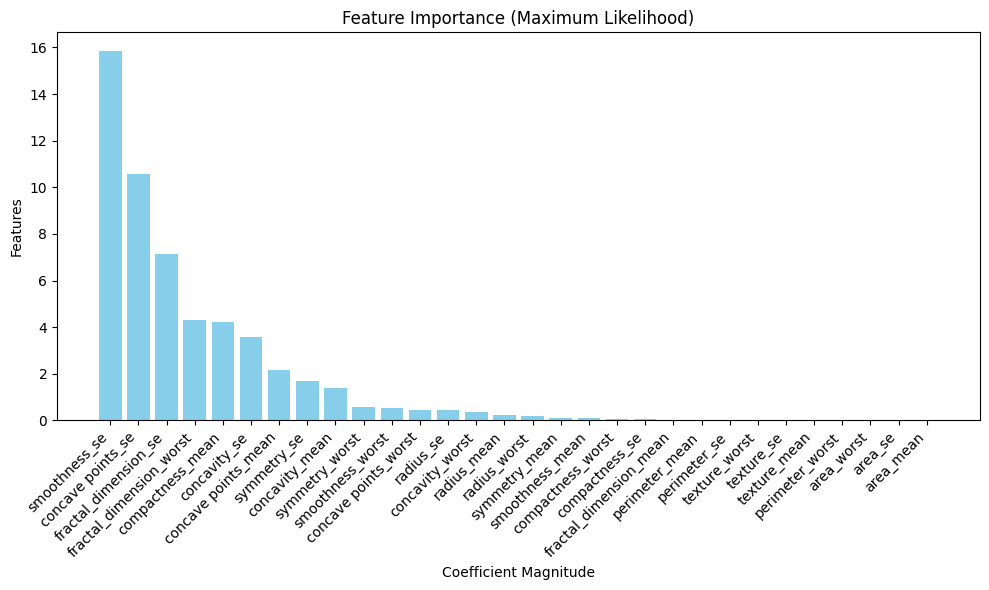

In [ ]:
maximum_likelihood_coefficients, maximum_likelihood_ranked_features = calculate_maximum_likelihood_feature_selection(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Least Squares Feature Selection

Least Squares Feature Selection is a feature selection method aimed at selecting features from a dataset that will improve the accuracy of the model or best explain the target variable. In this method, a linear regression model is used to determine the importance of features, and the least squares method is applied to this model.

Mathematically, Least Squares Feature Selection is performed by estimating the coefficients in the linear regression model and examining the absolute values of these coefficients. To determine the importance of each feature in the model, the absolute value of its coefficient is used. Features are prioritized or ranked based on the absolute values of their coefficients.

The mathematical formula for Least Squares Feature Selection is as follows:

$ \hat{\beta} = (X^TX)^{-1}X^Ty $

Where:
- $ \hat{\beta} $ is the estimated parameter vector of the model.
- $ X $ is the data matrix.
- $ y $ is the vector of the target variable.

This formula is used to calculate the coefficients of the linear regression model when the data matrix and the target variable are known. For feature selection, the absolute values of the coefficients are examined, and important features are identified or ranked.

In [ ]:
def calculate_least_squares_feature_selection(dataframe, drop_labels, target, plot_importance=True):
    # Import Necessary Libraries
    from sklearn.linear_model import LinearRegression

    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns

    # Train the model with least squares
    model = LinearRegression()
    model.fit(input_data, output_data)

    # Coefficients (Least Squares Estimators)
    coefficients = model.coef_

    # Sort coefficients and get ranked features
    ranked_features = np.argsort(np.abs(coefficients))[::-1]

    # Plot Importance Features
    if plot_importance:
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), np.abs(coefficients[ranked_features]), color='skyblue')
        plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45, ha='right')
        plt.xlabel('Coefficient Magnitude')
        plt.ylabel('Features')
        plt.title('Feature Importance (Least Squares)')
        plt.tight_layout()
        plt.show()

    return coefficients, ranked_features

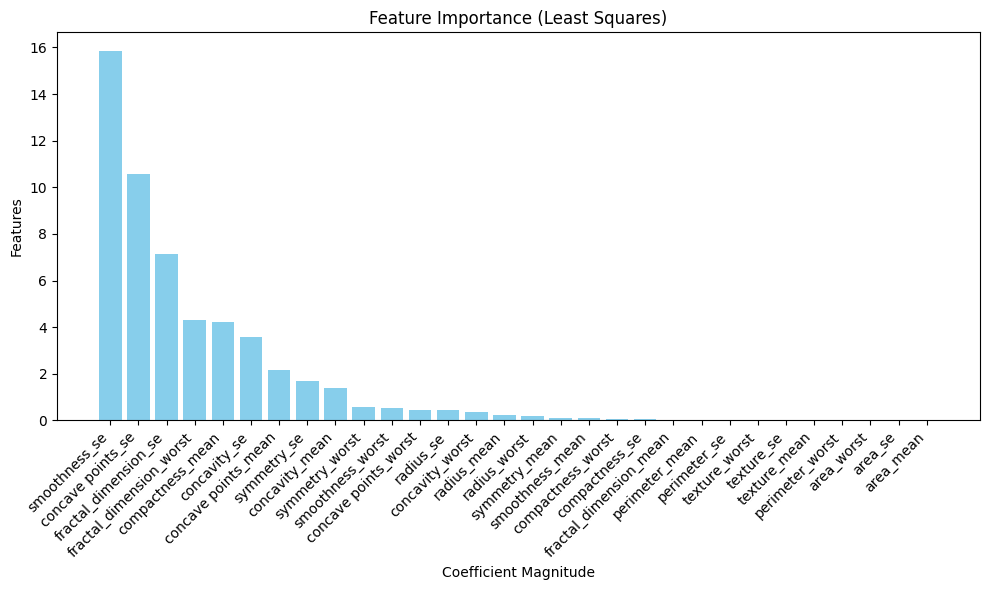

In [ ]:
least_squares_coefficients, least_squares_ranked_features = calculate_least_squares_feature_selection(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Laplacian Feature Selection Score

The Laplacian Feature Selection Score is a metric used to measure the importance of features in a dataset by leveraging graph theory. Here's the mathematical formula for the Laplacian Feature Selection Score:

1. Firstly, a graph representing the relationships between data points is constructed. This is often done using the k-Nearest Neighbors algorithm.

2. Next, the Laplacian matrix of this graph is computed. The Laplacian matrix captures the structural properties of the graph.

3. For each feature, the dot product between the Laplacian matrix and the feature vector is computed. The norm of this product represents the Laplacian Feature Selection Score of the feature.

Mathematically, the Laplacian Feature Selection Score is calculated as follows:

$ \text{Laplacian Score}(\text{Feature}_i) = || L \cdot \text{Feature}_i ||^2 $

Here:
- $ L $: Laplacian matrix.
- $ \text{Feature}_i $: Feature vector for feature $ i $.

This formula computes the dot product of each feature with the Laplacian matrix and then calculates the square of the norm of the resulting vector, representing the Laplacian Feature Selection Score of the feature. These scores can then be used to rank features based on their importance.

In [ ]:
def calculate_laplacian_feature_score(dataframe, drop_labels, target, plot_importance=True, n_neighbors=5):
    # Import Necessary Libraries
    from sklearn.neighbors import kneighbors_graph
    from scipy.sparse.csgraph import laplacian

    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns

    # Construct Graph using k-Nearest Neighbors
    graph = kneighbors_graph(input_data, n_neighbors=n_neighbors, mode='distance')

    # Compute Laplacian Matrix
    laplacian_matrix = laplacian(graph, normed=True)

    # Calculate Laplacian Feature Scores
    laplacian_scores = []
    for i in range(input_data.shape[1]):
        feature_vector = input_data.iloc[:, i].values.reshape(-1, 1)
        laplacian_score = np.linalg.norm(laplacian_matrix.dot(feature_vector)) ** 2
        laplacian_scores.append(laplacian_score)

    # Sort Laplacian Feature Scores
    ranked_features = np.argsort(laplacian_scores)[::-1]

    # Plot Feature Importance
    if plot_importance:
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), np.array(laplacian_scores)[ranked_features], color='skyblue')
        plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Laplacian Feature Score')
        plt.title('Laplacian Feature Score for Features')
        plt.tight_layout()
        plt.show()

    return laplacian_scores, ranked_features

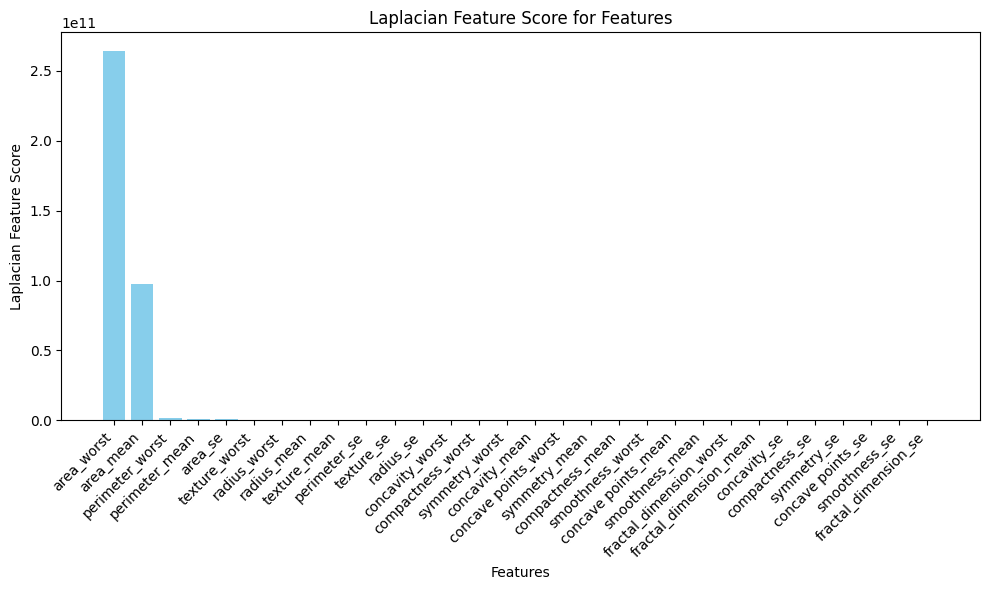

In [ ]:
laplacian_scores, laplacian_ranked_features = calculate_laplacian_feature_score(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Mutual Information

Mutual Information (MI) is a measure of the dependency between two random variables. It quantifies how much information is obtained about one random variable through another random variable. The mutual information between two variables X and Y is calculated using the following formula:

$ I(X;Y) = \sum_{x \in X} \sum_{y \in Y} p(x,y) \log \left( \frac{p(x,y)}{p(x)p(y)} \right) $

Here:
- $ I(X;Y) $: Mutual information between X and Y.
- $ p(x,y) $: Joint probability distribution of X and Y.
- $ p(x) $ and $ p(y) $: Marginal probability distributions of X and Y, respectively.

This formula serves as a fundamental tool for measuring the dependency between two variables. The value of mutual information can range from 0 to infinity. A value of 0 indicates no dependency between the variables, while larger values imply stronger dependencies.

In [ ]:
def calculate_mutual_information(dataframe, drop_labels, target, plot_importance=True):
    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns

    # Calculate Mutual Information
    mutual_informations = []
    for feature in input_data.columns:
        mi = calculate_mi(input_data[feature], output_data)
        mutual_informations.append(mi)

    # Sort Mutual Information
    ranked_features = np.argsort(mutual_informations)[::-1]

    # Plot Feature Importance
    if plot_importance:
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), np.array(mutual_informations)[ranked_features], color='skyblue')
        plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Mutual Information')
        plt.title('Mutual Information for Features')
        plt.tight_layout()
        plt.show()

    return mutual_informations, ranked_features

def calculate_mi(X, y):
    contingency_table = pd.crosstab(X, y)
    contingency_table = contingency_table.values
    p_xy = contingency_table / float(np.sum(contingency_table)) # Joint probability distribution
    p_x = np.sum(p_xy, axis=1)[:, np.newaxis] # Marginal probability distribution of X
    p_y = np.sum(p_xy, axis=0)[np.newaxis, :] # Marginal probability distribution of y
    p_xy[p_xy == 0] = 1e-12 # Avoid division by zero
    mi = np.sum(p_xy * np.log(p_xy / (p_x * p_y)))
    return mi

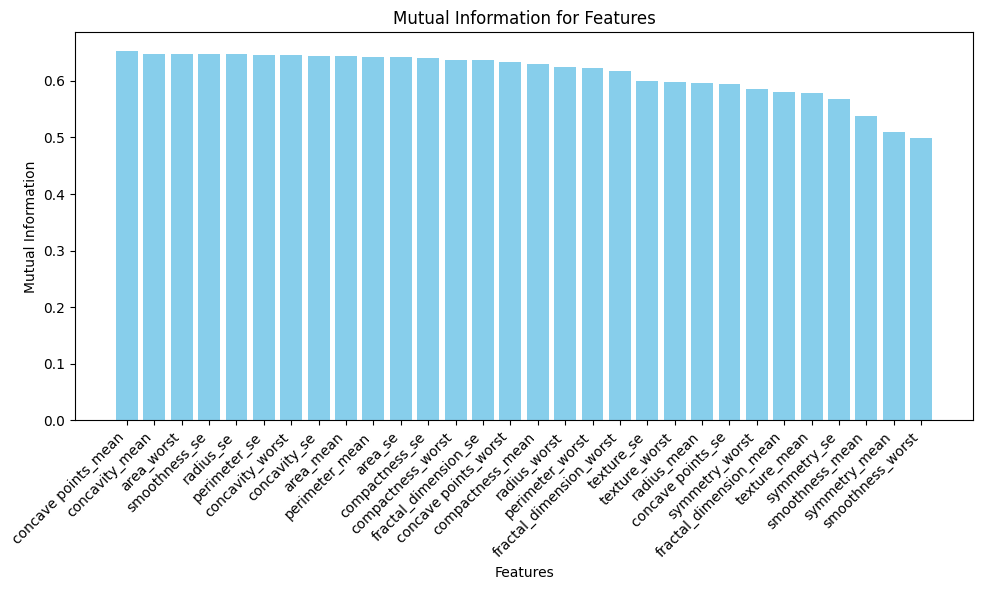

In [ ]:
mutual_informations, mutual_informations_ranked_features = calculate_mutual_information(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Euclidean Distance

Euclidean Distance is a commonly used metric to measure similarity or distance between features. It specifically represents the linear distance between two points in the feature space. Euclidean Distance is utilized in many machine learning and data mining algorithms as a measure of similarity or dissimilarity between features.

Mathematically, the Euclidean Distance between two points is calculated as follows:

$ d(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2} $

Here:
- $ \mathbf{p} $ and $ \mathbf{q} $ are feature vectors.
- $ p_i $ and $ q_i $ are the $i$-th components of vectors $ \mathbf{p} $ and $ \mathbf{q} $, respectively.
- $ n $ is the dimensionality of the feature vectors (i.e., the number of features).

Euclidean Distance serves as a tool to compute the distance between two feature vectors. A smaller Euclidean Distance indicates similarity between two vectors, while a larger Euclidean Distance indicates dissimilarity. It is particularly useful for determining how close or far clusters or data points are from each other in the feature space. Euclidean Distance is widely used in various machine learning and data mining applications, especially in clustering, classification, and dimensionality reduction tasks.

In [ ]:
def calculate_euclidean_distance_feature_selection(dataframe, drop_labels, target, plot_importance=True):
    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns

    # Calculate Euclidean Distance for each feature
    euclidean_distances = []
    for feature in input_data.columns:
        euclidean_distance = np.linalg.norm(input_data[feature] - output_data)
        euclidean_distances.append(euclidean_distance)

    # Sort features by Euclidean Distance
    ranked_features = np.argsort(euclidean_distances)[::-1]
    sorted_distances = np.sort(euclidean_distances)[::-1]

    # Plot Feature Importance
    if plot_importance:
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), sorted_distances, color='skyblue')
        plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45, ha='right')
        plt.xlabel('Euclidean Distance')
        plt.ylabel('Features')
        plt.title('Feature Importance (Euclidean Distance)')
        plt.tight_layout()
        plt.show()

    return sorted_distances, ranked_features

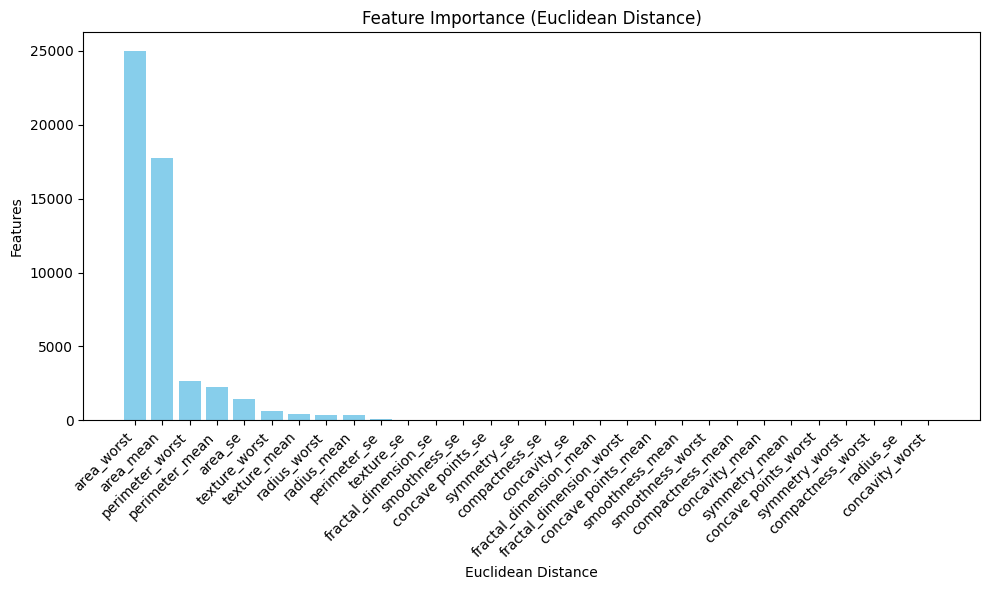

In [ ]:
sorted_distances, distances_ranked_features = calculate_euclidean_distance_feature_selection(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Cramer's V test

Cramer's V test is a statistical test used to measure the association between categorical variables. It is commonly used to assess the strength of the relationship between two categorical variables. When used for feature selection, Cramer's V test helps identify significant relationships between features.

Mathematically, Cramer's V test relies on the chi-square statistic and the dimensions of the features. The chi-square statistic is calculated to measure the relationship between two categorical variables, and then the Cramer's V value is computed.

Cramer's V value is calculated using the following formula:

$ V = \sqrt{\frac{\chi^2}{n \times (k - 1)}} $

Here:
- $ V $ represents the Cramer's V value.
- $ \chi^2 $ is the chi-square statistic.
- $ n $ represents the total number of observations.
- $ k $ represents the total number of categories in the features.

Cramer's V value ranges between 0 and 1. A higher value indicates a stronger relationship between the categorical variables. In feature selection, features with higher Cramer's V values are typically considered significant and preferred over others.

In [ ]:
def calculate_cramers_v_feature_selection(dataframe, drop_labels, target, plot_importance=True):
    # Import Necessary Libraries
    import scipy.stats as ss

    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns

    # Calculate Cramer's V values
    cramer_vs = []
    for feature in input_data.columns:
        confusion_matrix = pd.crosstab(input_data[feature], output_data)
        chi2, _, _, _ = ss.chi2_contingency(confusion_matrix)
        n = confusion_matrix.sum().sum()
        min_dim = min(confusion_matrix.shape) - 1
        cramer_v = np.sqrt(chi2 / (n * min_dim))
        cramer_vs.append(cramer_v)

    # Sort features by importance
    ranked_features = np.argsort(cramer_vs)[::-1]

    # Plot Feature Importance
    if plot_importance:
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), np.array(cramer_vs)[ranked_features], color='skyblue')
        plt.xticks(range(len(ranked_features)), [feature_names[i] for i in ranked_features], rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel("Cramer's V Value")
        plt.title("Feature Importance (Cramer's V)")
        plt.tight_layout()
        plt.show()

    return cramer_vs, ranked_features

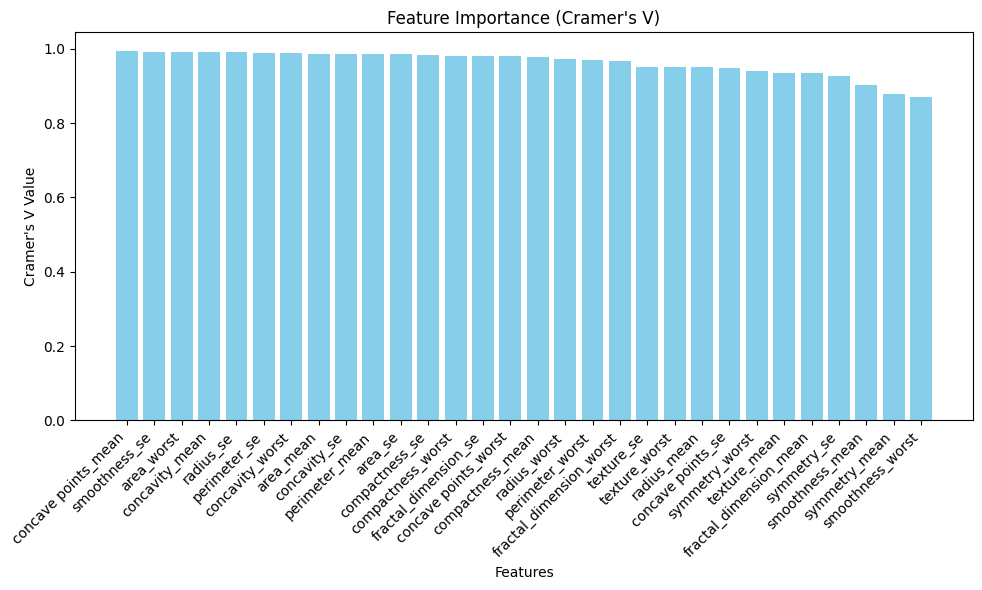

In [ ]:
cramer_vs, cramer_vs_ranked_features = calculate_cramers_v_feature_selection(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Markov Blanket Filter

The Markov Blanket Filter is a technique used to identify the Markov blanket, which is a subset of variables that preserves the independence of a variable. This filter is employed to determine the relationship of a variable with other variables and serves as an important tool for feature selection.

Mathematically, the Markov blanket for a variable $X_i$ consists of other variables that are generated by or generate $X_i$. The Markov blanket of $X_i$ includes variables that are directly connected to $X_i$ and those that are dependent on $X_i$.

The Markov blanket is commonly utilized in Bayesian networks and graphical models. It represents a combination of variables that best explains the behavior of a variable.

Mathematically, the Markov blanket of $X_i$ is defined as:

$ \text{MB}(X_i) = \text{Pa}(X_i) \cup \text{Ch}(X_i) \cup \text{Pa}(\text{Ch}(X_i)) $

Here:
- $ \text{MB}(X_i) $ denotes the Markov blanket of $X_i$.
- $ \text{Pa}(X_i) $ represents the set of parents of $X_i$, which are the variables directly connected to $X_i$.
- $ \text{Ch}(X_i) $ denotes the set of children of $X_i$, which are the variables directly dependent on $X_i$.
- $ \text{Pa}(\text{Ch}(X_i)) $ represents the set of parents of the children of $X_i$, which are the variables directly connected to the children of $X_i$.

The Markov blanket is utilized to describe the independence structure of a specific variable in Bayesian networks and can also be employed in feature selection processes.

In [ ]:
def calculate_markov_blanket_filter(dataframe, drop_labels, target, plot_importance=True):
    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns

    # Compute Markov Blanket
    markov_blanket = set()

    # Add Parents
    for feature in input_data.columns:
        if output_data.corr(input_data[feature]) != 0:
            markov_blanket.add(feature)

    # Add Children
    for feature in input_data.columns:
        if output_data.corr(input_data[feature]) != 0:
            children = set(input_data.columns[(input_data.corr()[feature] != 0)])
            markov_blanket = markov_blanket.union(children)

    # Add Parents of Children
    for child in markov_blanket:
        parents = set(input_data.columns[(input_data.corr()[child] != 0)])
        markov_blanket = markov_blanket.union(parents)

    # Remove Target Variable
    markov_blanket.discard(target)

    # Sort features by correlation with target
    markov_blanket_sorted = sorted(markov_blanket, key=lambda x: abs(output_data.corr(input_data[x])), reverse=True)
    correlation_values = [output_data.corr(input_data[feature]) for feature in markov_blanket_sorted]

    # Get feature indices
    feature_indices = [feature_names.get_loc(feature) for feature in markov_blanket_sorted]

    # Plot Importance Features
    if plot_importance:
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(markov_blanket_sorted)), correlation_values, color='skyblue')
        plt.xticks(range(len(markov_blanket_sorted)), markov_blanket_sorted, rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Correlation with Target')
        plt.title('Feature Importance (Markov Blanket)')
        plt.tight_layout()
        plt.show()

    return correlation_values, feature_indices

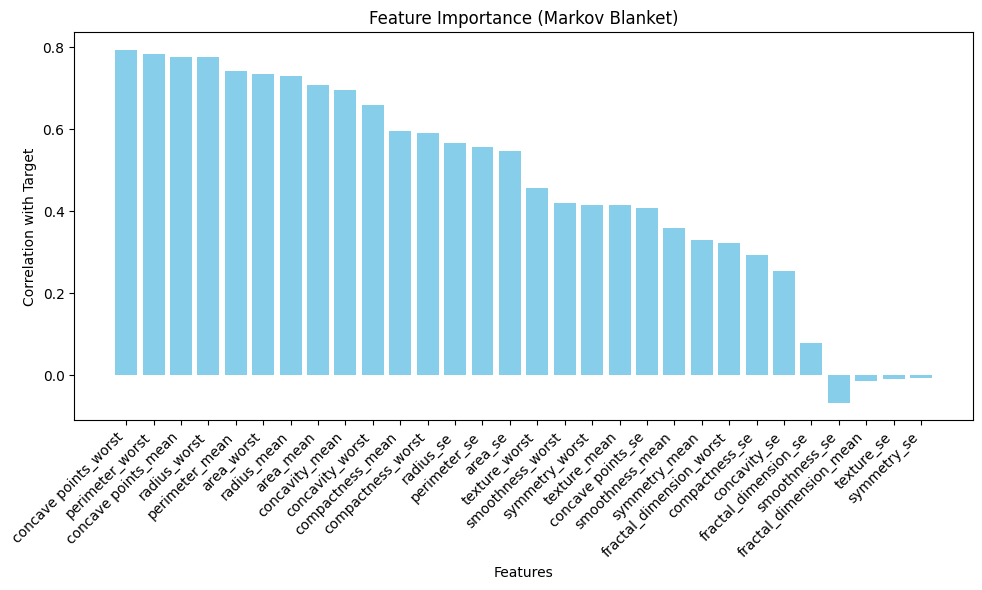

In [ ]:
markov_blanket_correlation_values, markov_blanket_feature_indices = calculate_markov_blanket_filter(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Kruskal-Wallis test

Kruskal-Wallis test is a non-parametric statistical test used to compare the median ranks of two or more independent groups. It is an extension of the Mann-Whitney U test for more than two groups. The test is based on the ranks of observations within each group and assesses whether the population medians across groups are equal or not.

The null hypothesis ($H_0$) of the Kruskal-Wallis test states that the population medians of all groups are equal, while the alternative hypothesis ($H_1$) suggests that at least one of the groups has a different population median. The test statistic $H$ is calculated as follows:

$ H = \frac{12}{N(N+1)} \sum_{i=1}^{k} \frac{R_i^2}{n_i} - 3(N+1) $

Where:
- $ k $ is the number of groups.
- $ N $ is the total number of observations across all groups.
- $ R_i $ is the sum of ranks for the $ i $th group.
- $ n_i $ is the number of observations in the $ i $th group.

Under the null hypothesis, the test statistic $ H $ approximately follows a chi-square ($ \chi^2 $) distribution with $ k-1 $ degrees of freedom.

If the p-value associated with the test statistic is less than a chosen significance level ($ \alpha $), typically 0.05, then the null hypothesis is rejected, indicating that there is evidence to suggest that at least one group's median is different from the others.

In summary, the Kruskal-Wallis test allows us to determine whether there are significant differences in the central tendencies of multiple groups based on their ranked data.

In [ ]:
def calculate_kruskal_wallis_feature_selection(dataframe, drop_labels, target, plot_importance=True):
    # Import Necessary Libraries
    from scipy.stats import kruskal

    # Load Dataset
    input_data = dataframe.drop(labels=drop_labels, axis=1)
    output_data = dataframe[target]
    feature_names = input_data.columns

    # Perform Kruskal-Wallis Test
    kruskal_results = {}
    for feature in feature_names:
        groups = [input_data[feature][output_data == category] for category in output_data.unique()]
        kruskal_results[feature] = kruskal(*groups).statistic

    # Sort Features by Importance
    ranked_features = sorted(kruskal_results, key=kruskal_results.get, reverse=True)

    # Plot Feature Importance
    if plot_importance:
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(ranked_features)), [kruskal_results[feature] for feature in ranked_features], color='skyblue')
        plt.xticks(range(len(ranked_features)), ranked_features, rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Kruskal-Wallis Statistic')
        plt.title('Feature Importance (Kruskal-Wallis Test)')
        plt.tight_layout()
        plt.show()

    # Get Indices of Important Features
    important_features_indices = [dataframe.columns.get_loc(feature) for feature in ranked_features]

    # Return Kruskal-Wallis Statistics and Indices of Important Features
    return [kruskal_results[feature] for feature in ranked_features], important_features_indices


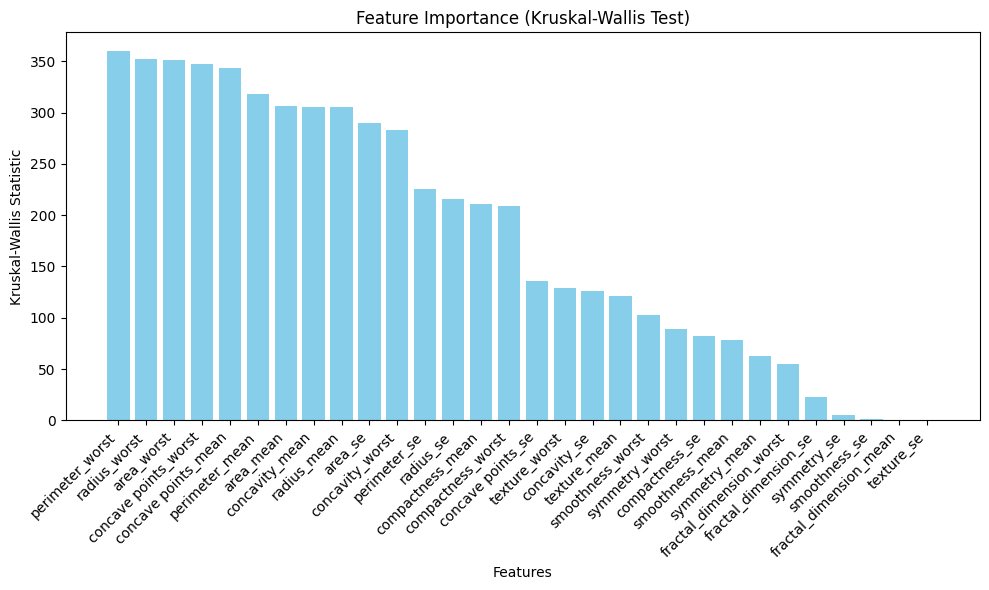

In [ ]:
kruskal_values, kruskal_features = calculate_kruskal_wallis_feature_selection(df, drop_labels=["id", "diagnosis"], target="diagnosis")

# Create Random Forest Model

In [ ]:
def all_filter_feature_selection_comparison(dataframe, drop_labels, target, methods, test_size=0.20, k_feature=10):
    # Initialize an empty list to store results as dictionaries
    results_list = []

    # Calculate Random Forest classifier performance without feature selection
    X = dataframe.drop(labels=drop_labels, axis=1)
    y = dataframe[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results_list.append({
        'Feature Selection Method': 'Without-Feature-Selection',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

    # Apply each feature selection method and save the results
    for method_name, method_func in methods.items():
        _, feature_importances = method_func(dataframe, drop_labels, target, plot_importance=False)
        # Select top k features
        top_k_features = np.argsort(feature_importances)[-k_feature:]
        # Train Random Forest classifier with selected features
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train.iloc[:, top_k_features], y_train)
        # Make predictions
        y_pred = rf.predict(X_test.iloc[:, top_k_features])
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        results_list.append({
            'Feature Selection Method': method_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        })

    # Convert results_list to DataFrame
    results_df = pd.DataFrame(results_list)

    # Plot results
    plt.figure(figsize=(10, 6))
    results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
    bars = plt.bar(results_df_sorted['Feature Selection Method'], results_df_sorted['Accuracy'], color='skyblue')
    bars[0].set_color('green')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Filter Feature Selection Method')
    plt.ylabel('Accuracy')
    plt.title('Comparison of All Filter Feature Selection Methods Using pyallffs Library')
    plt.ylim(0, 1)
    plt.show()

    # Display results sorted by accuracy
    results_df_sorted.to_csv("results.csv", index=False)
    print(results_df_sorted)

    return results_df_sorted  # Return the DataFrame with results


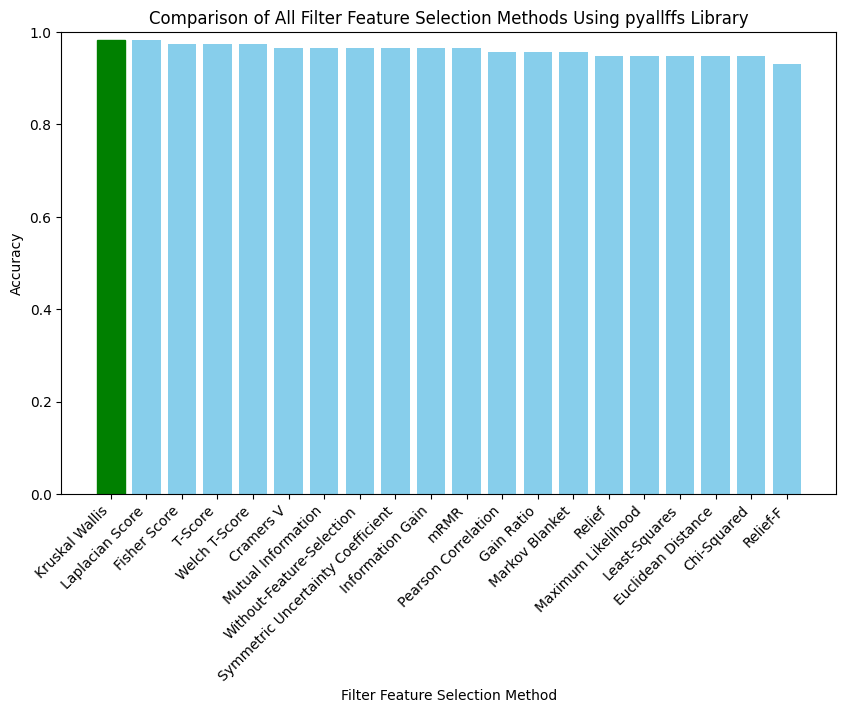

             Feature Selection Method  Accuracy  Precision  Recall  F1 Score  ROC AUC
19                     Kruskal Wallis    0.9825     1.0000  0.9535    0.9762   0.9767
14                    Laplacian Score    0.9825     0.9767  0.9767    0.9767   0.9813
1                        Fisher Score    0.9737     0.9762  0.9535    0.9647   0.9697
2                             T-Score    0.9737     0.9762  0.9535    0.9647   0.9697
3                       Welch T-Score    0.9737     0.9762  0.9535    0.9647   0.9697
17                          Cramers V    0.9649     0.9756  0.9302    0.9524   0.9581
15                 Mutual Information    0.9649     0.9756  0.9302    0.9524   0.9581
0           Without-Feature-Selection    0.9649     0.9756  0.9302    0.9524   0.9581
7   Symmetric Uncertainty Coefficient    0.9649     1.0000  0.9070    0.9512   0.9535
5                    Information Gain    0.9649     0.9756  0.9302    0.9524   0.9581
10                               mRMR    0.9649     1.

,Feature Selection Method,Accuracy,Precision,Recall,F1 Score,ROC AUC
19,Kruskal Wallis,0.9825,1.0000,0.9535,0.9762,0.9767
14,Laplacian Score,0.9825,0.9767,0.9767,0.9767,0.9813
1,Fisher Score,0.9737,0.9762,0.9535,0.9647,0.9697
2,T-Score,0.9737,0.9762,0.9535,0.9647,0.9697
3,Welch T-Score,0.9737,0.9762,0.9535,0.9647,0.9697
17,Cramers V,0.9649,0.9756,0.9302,0.9524,0.9581
15,Mutual Information,0.9649,0.9756,0.9302,0.9524,0.9581
0,Without-Feature-Selection,0.9649,0.9756,0.9302,0.9524,0.9581
7,Symmetric Uncertainty Coefficient,0.9649,1.0000,0.9070,0.9512,0.9535
5,Information Gain,0.9649,0.9756,0.9302,0.9524,0.9581


In [ ]:
methods = {'Fisher Score': calculate_fisher_score,
           'T-Score': calculate_t_score,
           'Welch T-Score': calculate_welch_t_score,
           'Chi-Squared': calculate_chi2_score,
           'Information Gain': calculate_information_gain,
           'Gain Ratio': calculate_gain_ratio,
           'Symmetric Uncertainty Coefficient': calculate_symmetric_uncertainty_coefficient,
           'Relief': calculate_relief,
           'Relief-F': calculate_relieff,
           'mRMR': calculate_mrmr,
           'Pearson Correlation': calculate_absolute_pearson_correlation,
           'Maximum Likelihood': calculate_maximum_likelihood_feature_selection,
           'Least-Squares': calculate_least_squares_feature_selection,
           'Laplacian Score': calculate_laplacian_feature_score,
           'Mutual Information': calculate_mutual_information,
           'Euclidean Distance': calculate_euclidean_distance_feature_selection,
           'Cramers V': calculate_cramers_v_feature_selection,
           'Markov Blanket': calculate_markov_blanket_filter,
           'Kruskal Wallis': calculate_kruskal_wallis_feature_selection}
all_filter_feature_selection_comparison(df, ["id", "diagnosis"], "diagnosis", methods)

# How to use pyallffs library

If you would like to access the source codes of our library, you can use the links below:

https://pypi.org/project/pyallffs/

https://github.com/tohid-yousefi/pyallffs

In [ ]:
!pip install pyallffs
from pyallffs import *

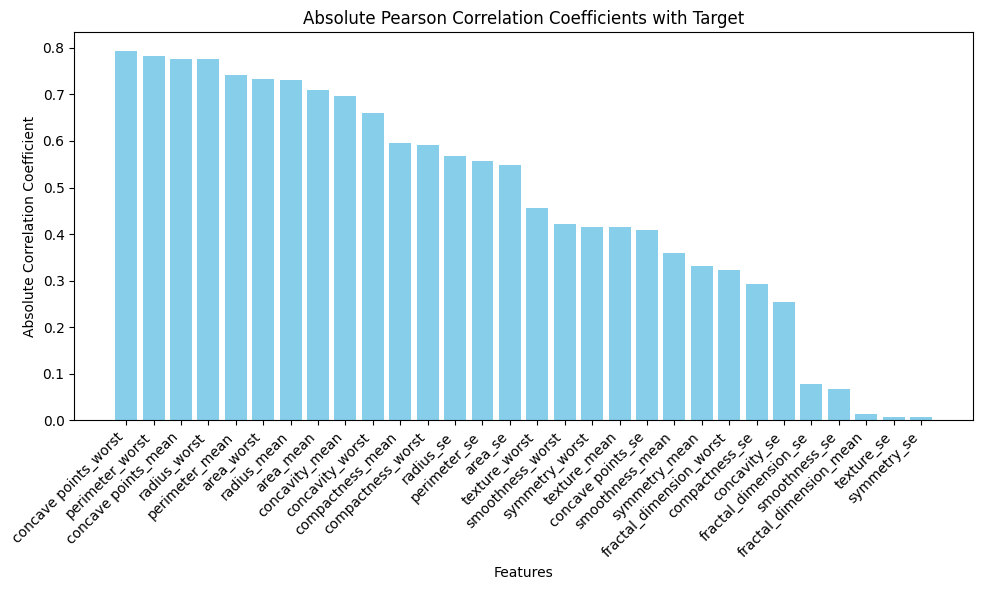

In [ ]:
APCC = AbsolutePearsonCorrelationCalculator(df, drop_labels=["id", "diagnosis"], target="diagnosis")
scores, ranked_features = APCC.calculate_absolute_pearson_correlation(plot_importance=True)